<a href="https://colab.research.google.com/github/vijayabalan07/micrsoft_cybersecurity/blob/main/test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [ ]:
data_tst=pd.read_csv("/content/sample_data/pro/GUIDE_Test.csv")

In [ ]:
data_tst.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


In [ ]:
list(data_tst.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [ ]:
pd.set_option('display.max_columns', None)
data_tst.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private


In [ ]:
data_tst.shape

(31980, 46)

In [ ]:
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31980 entries, 0 to 31979
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  31980 non-null  int64  
 1   OrgId               31980 non-null  int64  
 2   IncidentId          31980 non-null  int64  
 3   AlertId             31980 non-null  int64  
 4   Timestamp           31980 non-null  object 
 5   DetectorId          31980 non-null  int64  
 6   AlertTitle          31980 non-null  int64  
 7   Category            31980 non-null  object 
 8   MitreTechniques     14280 non-null  object 
 9   IncidentGrade       31980 non-null  object 
 10  ActionGrouped       14 non-null     object 
 11  ActionGranular      14 non-null     object 
 12  EntityType          31980 non-null  object 
 13  EvidenceRole        31980 non-null  object 
 14  DeviceId            31980 non-null  int64  
 15  Sha256              31980 non-null  int64  
 16  IpAd

**data handling** *italicized text*

In [ ]:
threshold= len(data_tst)* 0.5   # removing 50% above null value
data_tst=data_tst.dropna(thresh=threshold,axis=1)

In [ ]:
data_tst.shape

(31980, 36)

In [ ]:
data_tst.duplicated().sum()

13

In [ ]:
data_tst.drop_duplicates(inplace=True)

<ipython-input-14-d9d4deec7d23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tst.drop_duplicates(inplace=True)


In [ ]:
data_tst

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,2833.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,0.0,0.0,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,14.0,22.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549.0,673934.0,425863.0,136104.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31975,1116691498684,26,24878,758742,2024-06-04T08:28:55.000Z,31,554,Malware,BenignPositive,File,Related,98799,1352,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,3979.0,4221.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
31976,515396075847,315,15349,776301,2024-06-13T21:46:12.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,700,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,1975.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,0.0,0.0,242.0,1445.0,10630.0,Public
31977,1597727835731,1,273,102720,2024-06-11T12:33:01.000Z,0,0,InitialAccess,TruePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Private
31978,670014901928,100,11488,11726,2024-06-02T22:29:08.000Z,72,53,Impact,BenignPositive,Ip,Related,98799,138268,58663,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public


In [ ]:
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31967 entries, 0 to 31979
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  31967 non-null  int64  
 1   OrgId               31967 non-null  int64  
 2   IncidentId          31967 non-null  int64  
 3   AlertId             31967 non-null  int64  
 4   Timestamp           31967 non-null  object 
 5   DetectorId          31967 non-null  int64  
 6   AlertTitle          31967 non-null  int64  
 7   Category            31967 non-null  object 
 8   IncidentGrade       31967 non-null  object 
 9   EntityType          31967 non-null  object 
 10  EvidenceRole        31967 non-null  object 
 11  DeviceId            31967 non-null  int64  
 12  Sha256              31967 non-null  int64  
 13  IpAddress           31967 non-null  int64  
 14  Url                 31967 non-null  int64  
 15  AccountSid          31966 non-null  float64
 16  AccountUp

In [ ]:
#mode imputation because of catagorial columns

data_tst["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0],inplace=True)

<ipython-input-17-250e31f5011d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tst["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0],inplace=True)


In [ ]:
data_tst['Timestamp']=pd.to_datetime(data_tst['Timestamp']) # data clean Timestamp

In [ ]:
data_tst['Timestamp'].head()

,Timestamp
0,2024-06-04 22:56:27+00:00
1,2024-06-03 12:58:26+00:00
2,2024-06-08 03:20:49+00:00
3,2024-06-12 12:07:31+00:00
4,2024-06-06 17:42:05+00:00


In [ ]:
data_tst["Day"]=data_tst["Timestamp"].dt.day
data_tst["Month"]=data_tst["Timestamp"].dt.month
data_tst["Year"]=data_tst["Timestamp"].dt.year
data_tst["Hour"]=data_tst["Timestamp"].dt.hour
data_tst["Time"]=data_tst["Timestamp"].dt.time

In [ ]:
[features for features in data_tst.columns if data_tst[features].isnull().sum()>0]

['AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [ ]:
data_tst.drop("Timestamp",axis=1,inplace=True)  # doprring timestamp column
print(data_tst.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category   IncidentGrade         EntityType EvidenceRole  \
0    LateralMovement  BenignPositive               User     Impacted   
1  CommandAndControl  BenignPositive            Machine     Impacted   
2    LateralMovement  BenignPositive            Process      Related   
3      InitialAccess   FalsePositive  CloudLogonSession      Related   
4          Discovery  BenignPositive               User     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396      2610.0      3699.0   
1 

In [ ]:
pd.set_option("display.max_columns", None)
data_tst.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,2833.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,0.0,0.0,242.0,1445.0,10630.0,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,14.0,22.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549.0,673934.0,425863.0,136104.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public,6,6,2024,17,17:42:05


In [ ]:
data_tst['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,13464
TruePositive,11536
FalsePositive,6967


In [ ]:
data_tst.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

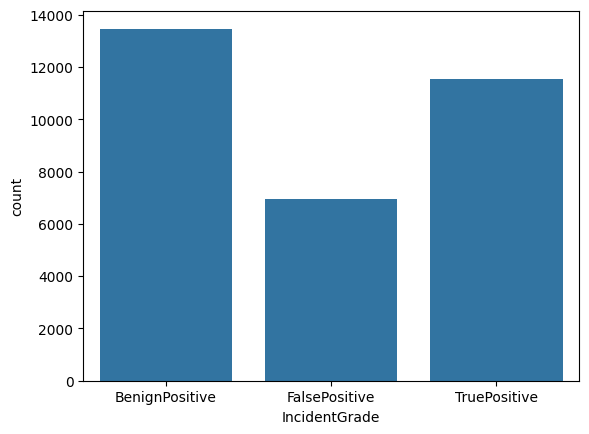

In [ ]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_tst)
plt.show()

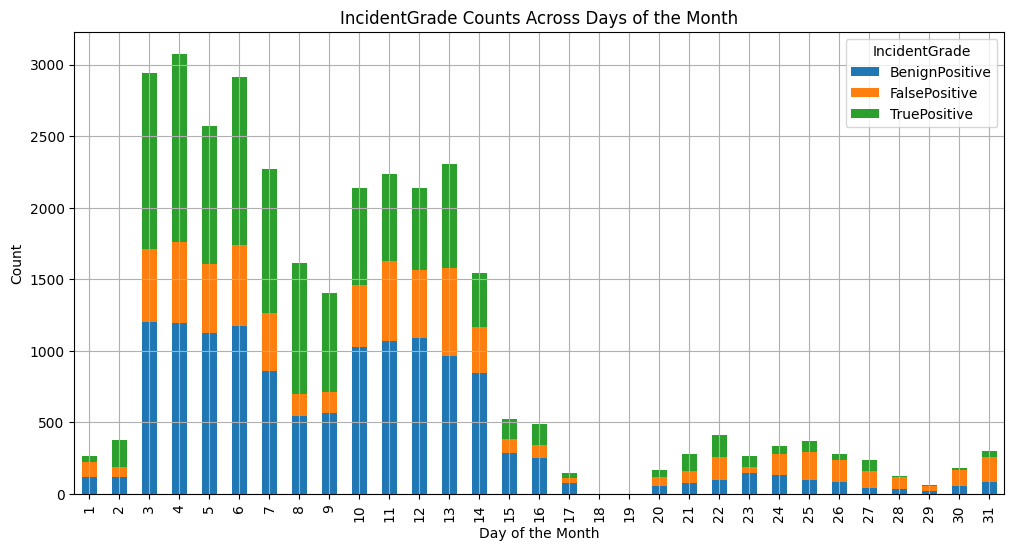

In [ ]:
# Aggregate data
day_incident_grade = data_tst.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

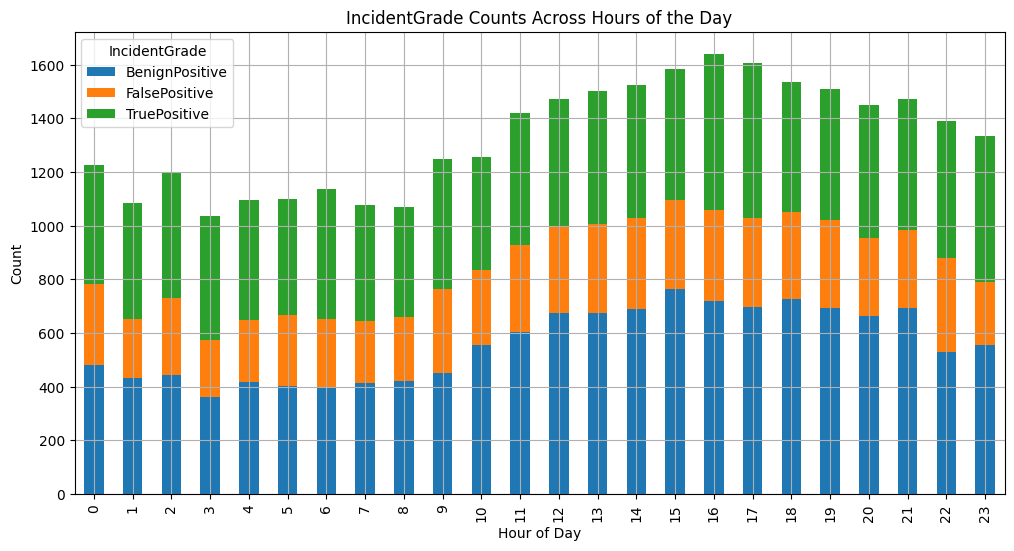

In [ ]:
# Aggregate data

hour_incident =data_tst.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()


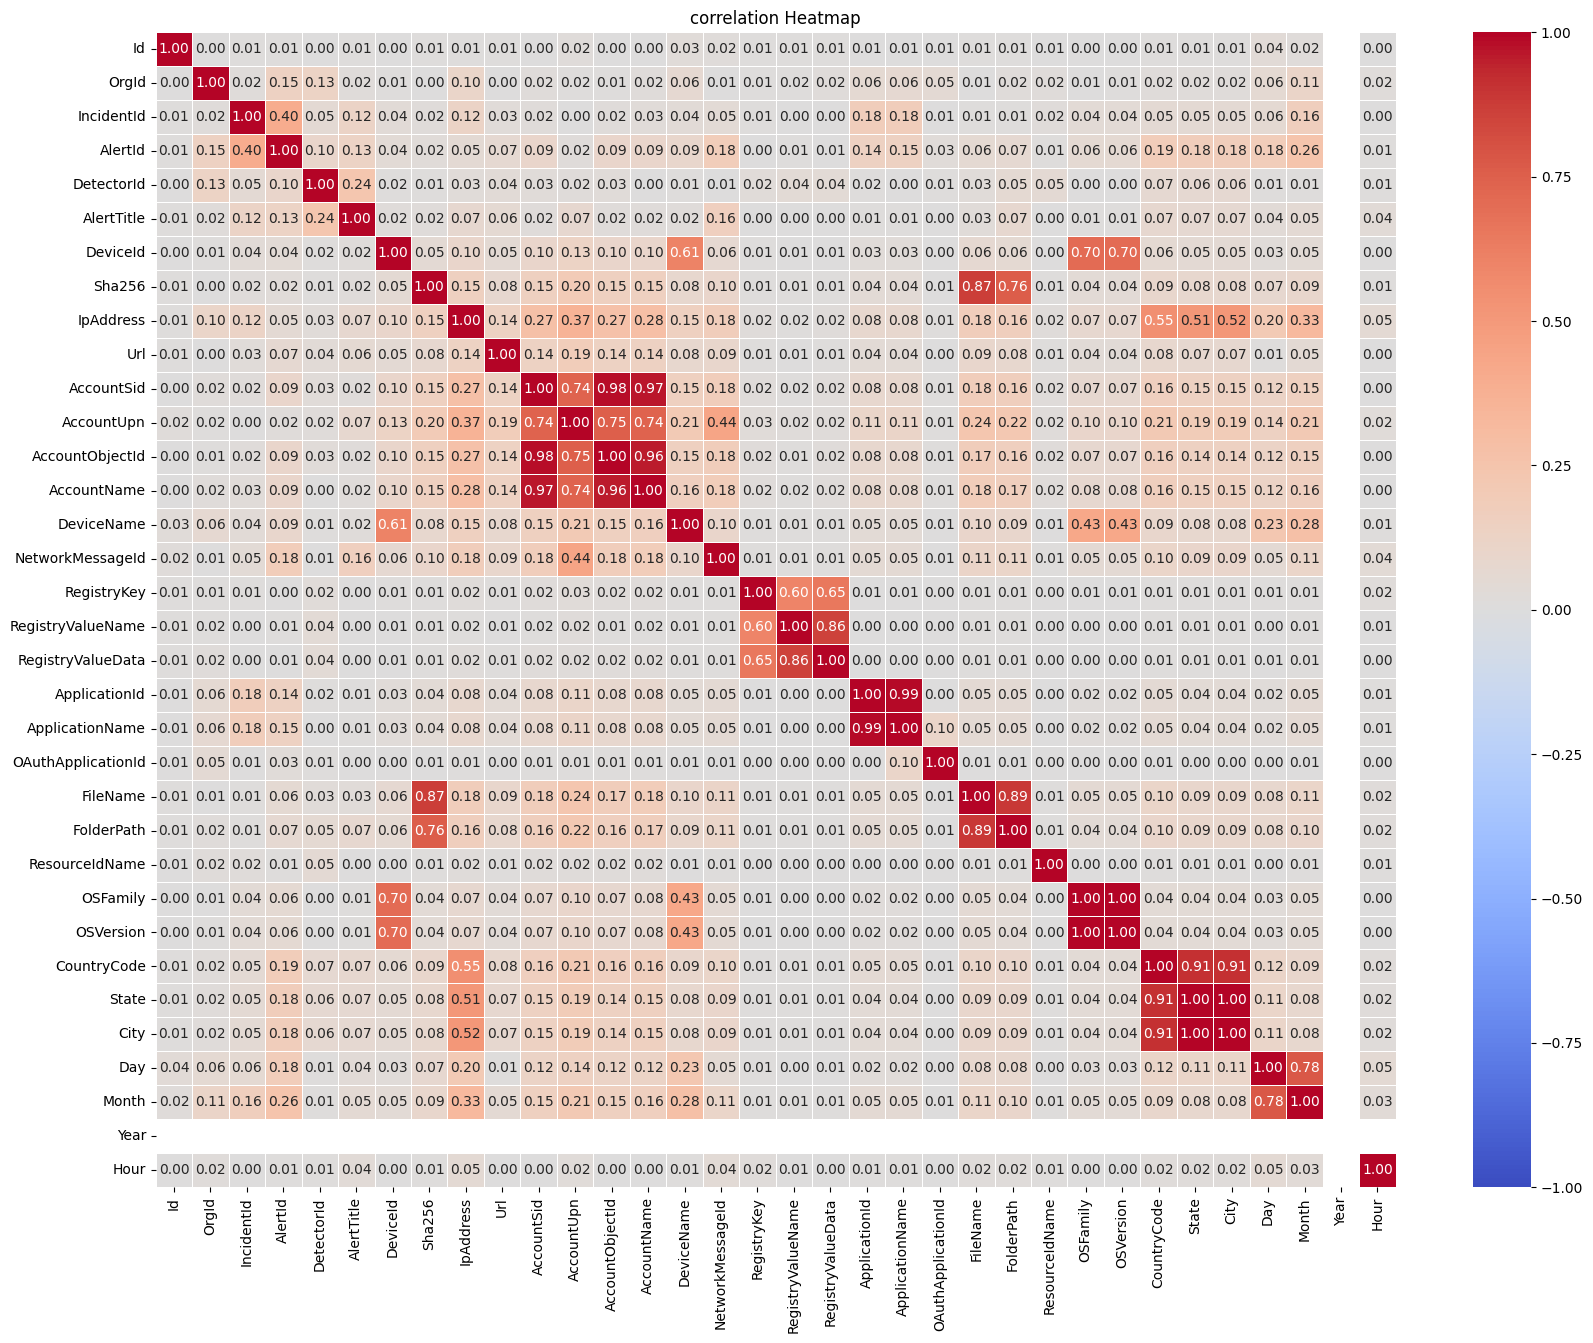

In [ ]:
# selecting numerical col
numeric_df=data_tst.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
# dropping 70% above correlated columns
data_tst.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [ ]:
data_tst

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,360606,160396,863.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,360606,160396,453297.0,2833.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,14.0,3586.0,10630.0,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,360606,160396,136104.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Public,6,6,2024,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31975,1116691498684,26,24878,758742,31,554,Malware,BenignPositive,File,Related,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,3979.0,3586.0,10630.0,Public,4,6,2024,8,08:28:55
31976,515396075847,315,15349,776301,2,2,CommandAndControl,BenignPositive,Machine,Impacted,700,360606,160396,453297.0,1975.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Public,13,6,2024,21,21:46:12
31977,1597727835731,1,273,102720,0,0,InitialAccess,TruePositive,CloudLogonSession,Related,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Private,11,6,2024,12,12:33:01
31978,670014901928,100,11488,11726,72,53,Impact,BenignPositive,Ip,Related,98799,58663,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,Public,2,6,2024,22,22:29:08


In [ ]:
#encoding
data_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31967 entries, 0 to 31979
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  31967 non-null  int64  
 1   OrgId               31967 non-null  int64  
 2   IncidentId          31967 non-null  int64  
 3   AlertId             31967 non-null  int64  
 4   DetectorId          31967 non-null  int64  
 5   AlertTitle          31967 non-null  int64  
 6   Category            31967 non-null  object 
 7   IncidentGrade       31967 non-null  object 
 8   EntityType          31967 non-null  object 
 9   EvidenceRole        31967 non-null  object 
 10  DeviceId            31967 non-null  int64  
 11  IpAddress           31967 non-null  int64  
 12  Url                 31967 non-null  int64  
 13  AccountName         31966 non-null  float64
 14  DeviceName          31966 non-null  float64
 15  NetworkMessageId    31966 non-null  float64
 16  RegistryK

In [ ]:
data_tst.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [ ]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']

In [ ]:
# Label encoder
encoders = {}
for i in Categorical_colts:
    le = LabelEncoder()
    data_tst[i]=le.fit_transform(data_tst[i])
    encoders[i]=le

In [ ]:
data_tst

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,21,0,98799,360606,160396,863.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,0,4,6,2024,22,22370
1,1400159342154,3,91158,632273,2,2,1,0,9,0,1239,360606,160396,453297.0,2833.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,3,6,2024,12,11405
2,1279900255923,145,32247,131719,2932,10807,11,0,16,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,14.0,3586.0,10630.0,1,8,6,2024,3,2887
3,60129547292,222,15294,917686,0,0,10,1,5,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,12,6,2024,12,10498
4,515396080539,363,7615,5944,27,18,5,0,21,0,98799,360606,160396,136104.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,6,6,2024,17,16816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31975,1116691498684,26,24878,758742,31,554,12,0,6,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,3979.0,3586.0,10630.0,1,4,6,2024,8,7067
31976,515396075847,315,15349,776301,2,2,1,0,9,0,700,360606,160396,453297.0,1975.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,13,6,2024,21,21227
31977,1597727835731,1,273,102720,0,0,10,2,5,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,0,11,6,2024,12,10948
31978,670014901928,100,11488,11726,72,53,9,0,8,1,98799,58663,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,2,6,2024,22,21949


In [ ]:
data_tst.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'Usage', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [ ]:
data_tst1=data_tst.copy()

In [ ]:
data_tst1.to_csv('/content/mtest_process.csv',index= False)

In [ ]:
data_tst1.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,21,0,98799,360606,160396,863.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,0,4,6,2024,22,22370
1,1400159342154,3,91158,632273,2,2,1,0,9,0,1239,360606,160396,453297.0,2833.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,3,6,2024,12,11405
2,1279900255923,145,32247,131719,2932,10807,11,0,16,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,14.0,3586.0,10630.0,1,8,6,2024,3,2887
3,60129547292,222,15294,917686,0,0,10,1,5,1,98799,360606,160396,453297.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,12,6,2024,12,10498
4,515396080539,363,7615,5944,27,18,5,0,21,0,98799,360606,160396,136104.0,153085.0,529644.0,1631.0,860.0,2251.0,881.0,289573.0,3586.0,10630.0,1,6,6,2024,17,16816


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =RandomOverSampler(random_state = 45)

In [ ]:
val =data_tst1.drop('IncidentGrade', axis =1)

In [ ]:
tar = data_tst1['IncidentGrade']

In [ ]:
tar.value_counts()

,count
IncidentGrade,
0,13464
2,11536
1,6967


In [ ]:
oval,otar = os.fit_resample(val,tar)

In [ ]:
otar.value_counts()

,count
IncidentGrade,
0,13464
1,13464
2,13464


In [ ]:
# feature selection

In [ ]:
fs = RandomForestClassifier(n_estimators = 300, random_state =56)

In [ ]:
fs.fit(oval,otar)

RandomForestClassifier(n_estimators=300, random_state=56)

In [ ]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Id',
 'Day',
 'Time',
 'Category',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'NetworkMessageId',
 'DeviceName']

In [ ]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [ ]:
traindata.shape

(32313, 28)

In [ ]:
testdata.shape

(8079, 28)

In [ ]:
#model building
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [ ]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [ ]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [ ]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [ ]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [ ]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [ ]:
dttest_metrics=metrics(testlab,dtts_pred)

In [ ]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,63.615263,63.361802
1,Precision,68.567298,68.314775
2,Recall,63.624213,63.321419
3,Macro F1,64.271897,63.990865


In [ ]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [ ]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [ ]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [ ]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [ ]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,81.880358,80.604035
1,Precision,85.987336,84.825335
2,Recall,81.894590,80.545979
3,Macro F1,82.234760,80.970151


In [ ]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [ ]:
xgbmodel.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)

In [ ]:
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [ ]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,97.620153,92.152494
1,Precision,97.637339,92.243335
2,Recall,97.620169,92.158749
3,Macro F1,97.622635,92.167406
